# Import the necessary Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [60]:
import tensorflow as tf

In [61]:
import keras as ke

# Import dataset from KERAS

In [62]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

# CLASS NAMES

0. = 'airplane'

1. = 'automobile'

2. = 'bird'

3. = 'cat'

4. = 'deer'

5. = 'dog'

6. = 'frog'

7. = 'horse'

8. = 'ship'

9. = 'truck'

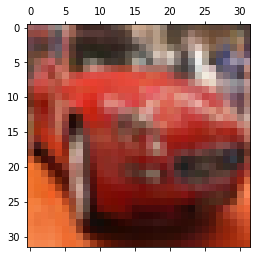

In [63]:
plt.matshow(x_train[5])

In [64]:
y_train[5]

array([1], dtype=uint8)

In [65]:
x_train.shape

(50000, 32, 32, 3)

In [66]:
x_test.shape

(10000, 32, 32, 3)

# No.of distinct features

In [67]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# NORMALIZATION

In [68]:
x_train = x_train/255
x_test = x_test/255

# Model Building

In [69]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras import layers

In [71]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3),activation = 'relu' ,input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3),activation = 'relu'))


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

# optimizer = adding weightage

# loss = mean square error

# Accuracy = model performance

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 256s 147ms/step - loss: 1.8013 - accuracy: 0.3231 - val_loss: 1.3208 - val_accuracy: 0.5264
Epoch 2/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.2751 - accuracy: 0.5439 - val_loss: 1.1818 - val_accuracy: 0.5791
Epoch 3/10
1563/1563 [==============================] - 153s 98ms/step - loss: 1.1104 - accuracy: 0.6042 - val_loss: 1.0470 - val_accuracy: 0.6307
Epoch 4/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.0079 - accuracy: 0.6434 - val_loss: 1.0039 - val_accuracy: 0.6451
Epoch 5/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.9455 - accuracy: 0.6698 - val_loss: 0.9882 - val_accuracy: 0.6519
Epoch 6/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.8794 - accuracy: 0.6877 - val_loss: 0.9365 - val_accuracy: 0.6684
Epoch 7/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.8238 - accuracy: 0.7096 - val_loss: 

In [79]:
model_pred = model.predict(x_test)

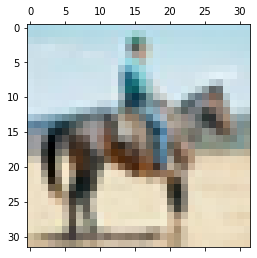

In [80]:
plt.matshow(x_test[521])

In [82]:
np.argmax(model_pred[521])

7

0 = 'airplane'
1 = 'automobile'
2 = 'bird'
3 = 'cat'
4 = 'deer'
5 = 'dog'
6 = 'frog'
7 = 'horse'
8 = 'ship'
9 = 'truck'

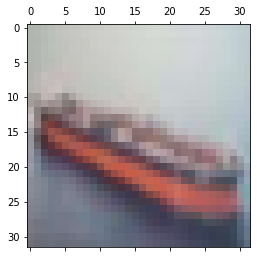

In [83]:
plt.matshow(x_test[999])

In [84]:
np.argmax(model_pred[999])

8

# Graphical representation

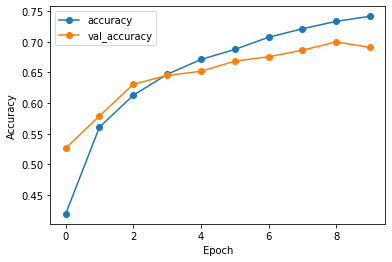

In [93]:
plt.plot(history.history['accuracy'], label='accuracy',marker='o')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy and loss of the model

In [94]:
acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.8922 - accuracy: 0.6909


In [97]:
accuracy = acc[1]*100

In [98]:
accuracy

69.09000277519226

In [99]:
loss = acc[0]*100

In [100]:
loss

89.22290205955505